# YBI Foundation Capstone Project

**WATER QUALITY PREDICTION**

# Understanding about Data Set


**Context:**

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

**Attributes of the Dataset:**
1. pH value
2. Hardness
3. Solids (Total dissolved solids - TDS)
4. Chloramines
5. Sulfate
6. Conductivity
7. Organic_carbon
8. Trihalomethanes
9. Turbidity
10. Potability

Here I am going to predict water potability using **Ensemble-Bagging Technique**.

**Potability:**

->Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# Importing Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 

# Import CSV Dataset 

In [ ]:
df = pd.read_csv(r"https://raw.githubusercontent.com/Praveenvuddagiri/Water-Quality-Prediction-/main/water_potability.csv") 
#importing water portability dataset from my github repository.

# Getting First and Last Five rows of Dataset

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


# Getting Information About Dataset 

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Checking for the Missing values and droping those rows

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df = df.dropna()
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


Now the rows of dataset are reduced to 2011 from 3275 after droping rows with missing values.

In [ ]:
df.shape

(2011, 10)

# Getting column names from CSV file

In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

# Data Visualization

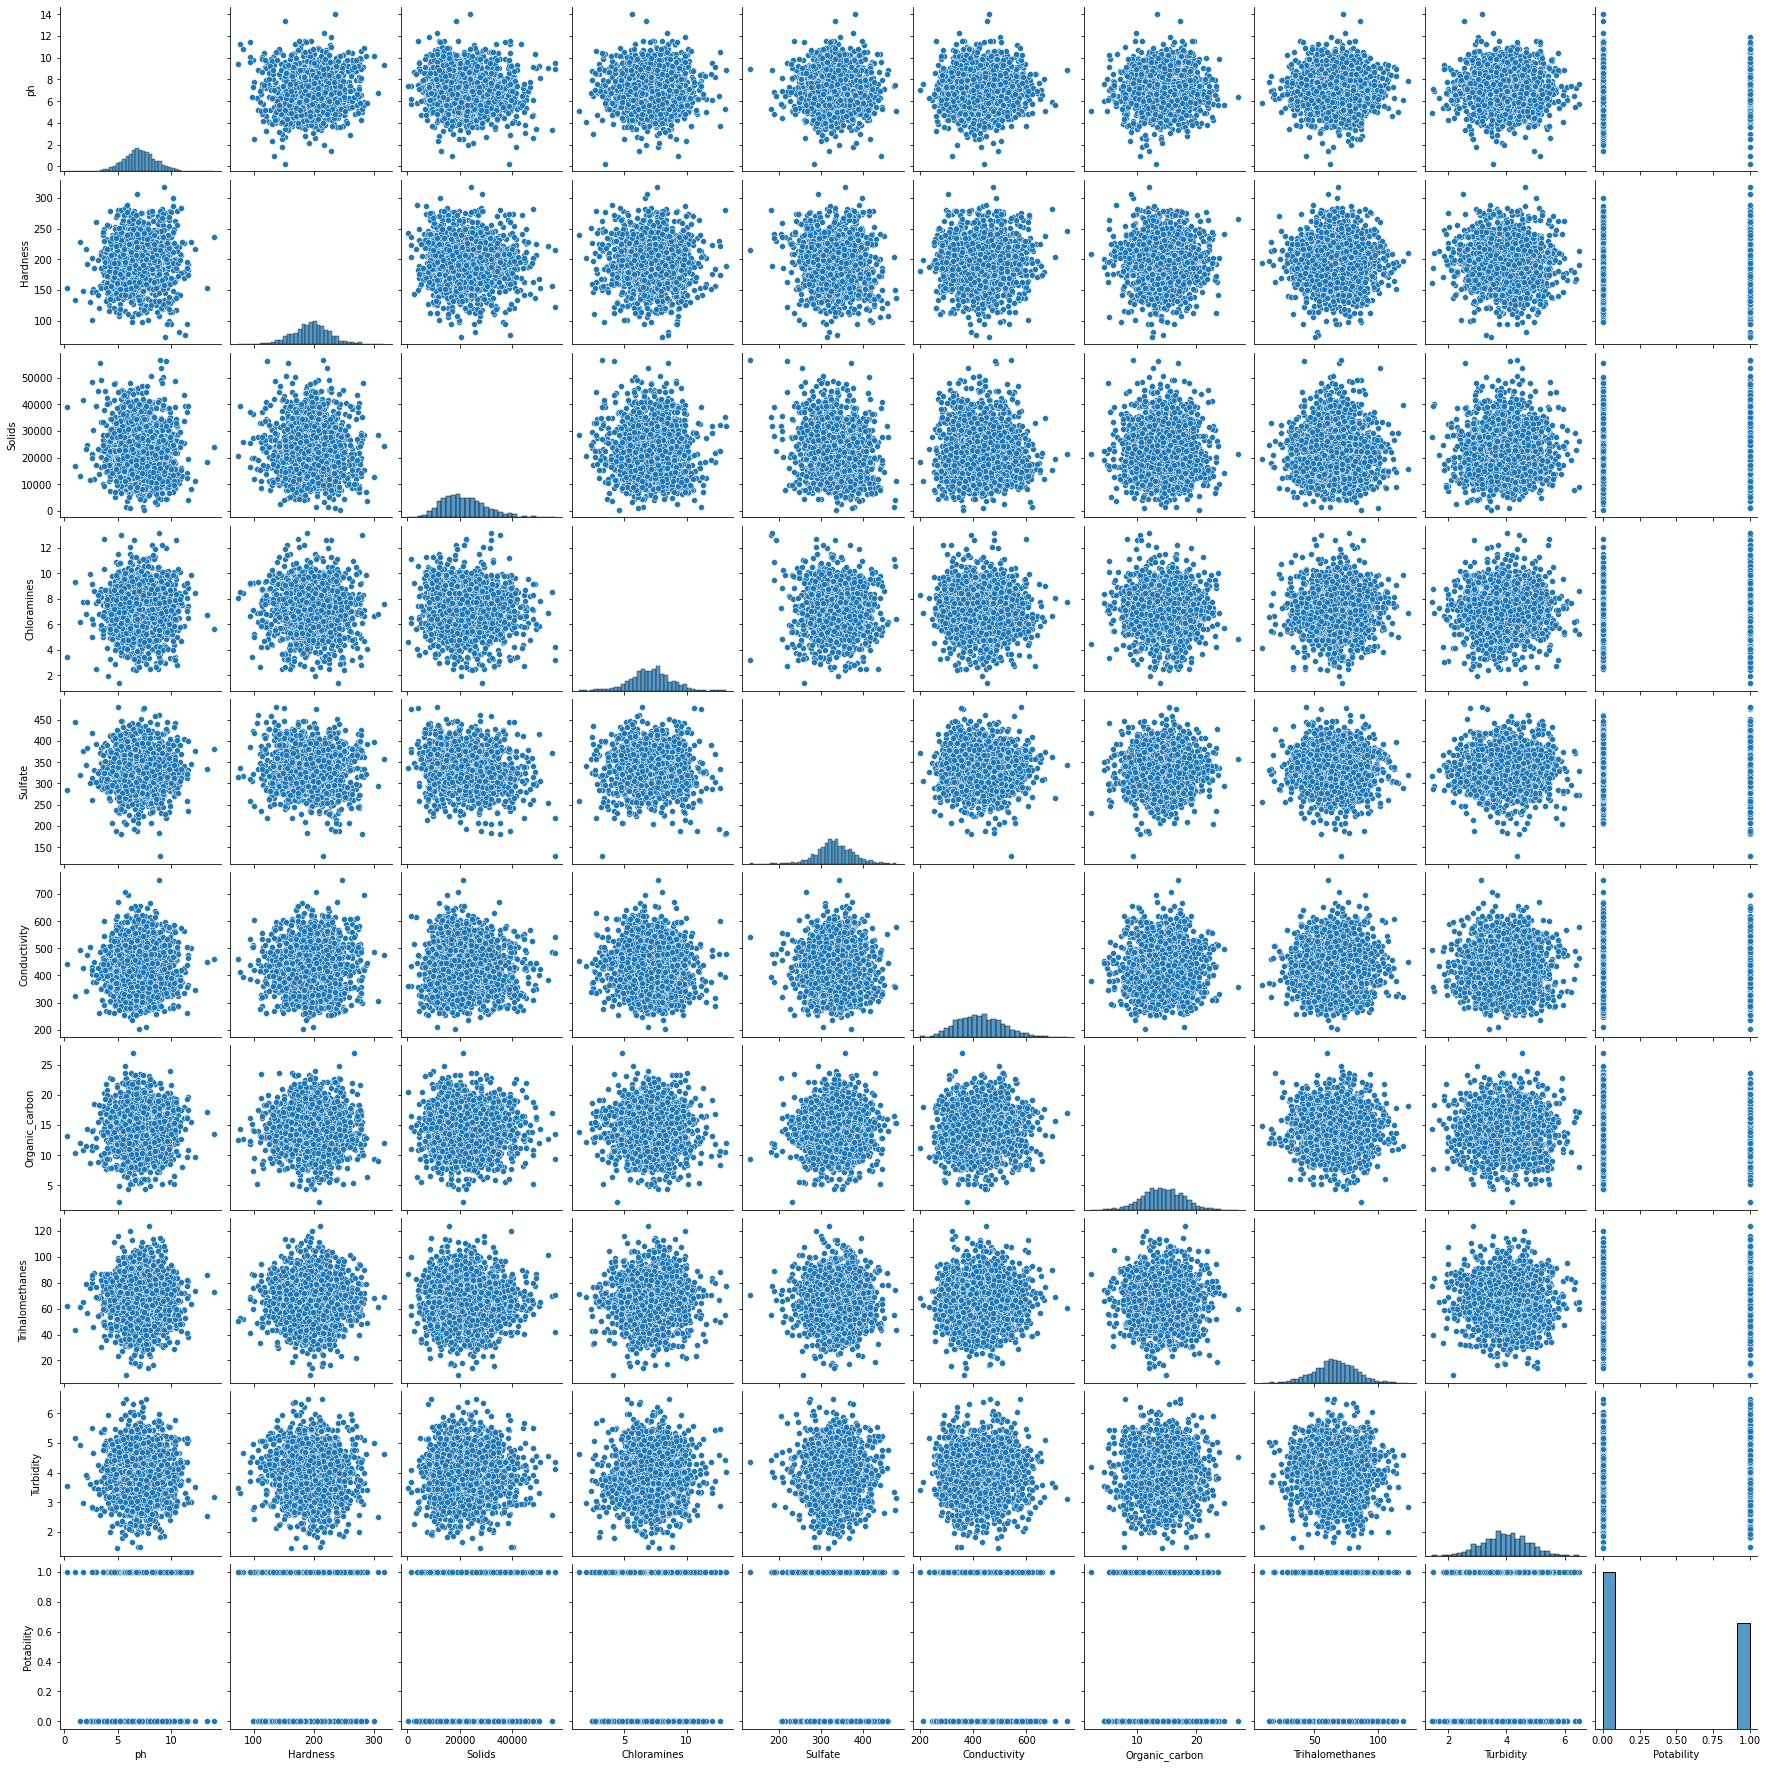

In [ ]:
sns.pairplot(df)

# Describing X(Independent or Feature Variable) and y(Dependent or Target variable)

In [ ]:
X=df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

In [ ]:
y=df['Potability']

In [ ]:
X.shape

(2011, 9)

In [ ]:
y.shape

(2011,)

# Getting Description of Dataset

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [ ]:
#So by studying the description of dataset.
#Here the data had to be Standardized.

# Standardization of Data

In [ ]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
X

array([[ 0.7824658 ,  0.56411376,  0.01168692, ...,  1.22703167,
         2.11165179,  0.84476056],
       [ 1.27546291, -0.45565257, -0.45583491, ..., -0.84215371,
        -2.14039865,  0.13503344],
       [-0.95483488, -0.23461412,  0.7906452 , ..., -1.79234008,
        -0.7144228 , -1.80736621],
       ...,
       [ 2.8004919 , -3.10036538,  1.76750279, ...,  0.54602107,
        -1.5455849 ,  0.51212515],
       [-0.64615977, -0.28531709,  0.48857575, ..., -0.6889287 ,
        -0.3721083 , -0.3845623 ],
       [-1.53717226, -0.07007504,  2.9702871 , ..., -0.139372  ,
         0.01784567,  0.59743748]])

# Splitting of Data for Training and Testing

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.75, random_state=1234) 
#Using 75% of data for Training the model

In [ ]:
#Getting Shape of Train and Test variables.
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((1508, 9), (503, 9), (1508,), (503,))

# Invoking RandomForestClassifier Function



In [ ]:
model = RandomForestClassifier()

# Fitting and Prediction of model

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred #Printing the predicted values.

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,

# Checking Accuracy of the Model

In [ ]:
confusion_matrix(y_test,y_pred)

array([[258,  39],
       [128,  78]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.87      0.76       297
           1       0.67      0.38      0.48       206

    accuracy                           0.67       503
   macro avg       0.67      0.62      0.62       503
weighted avg       0.67      0.67      0.64       503



So by the output of above classification_report we can conclude that the accuracy of the Model is 0.69 i.e., 69% .

# Future Prediction

In [ ]:
X1=[[-0.06823223, -0.39002321,  0.13854075, -0.3998376 , -0.24442076,
        0.53973164,  0.51897402, -0.02520623,  1.02187051]] #data after standardization.
pred1 =  model.predict(X1)
if pred1[0] == 0:
  print("The Water is not fit for Drinking!!!")
else:
  print("The Water is fit for Drinking!!!") 

The Water is not fit for Drinking!!!


In [ ]:
X2=[[-0.52079993, -0.24943949,  0.65505935,  1.26686816, -0.25019645,
       -1.85241011, -0.32112369, -0.43218357, -0.40618242]] #data after standardization.
pred2 =  model.predict(X2)
if pred2[0] == 0:
  print("The Water is not fit for Drinking!!!")
else:
  print("The Water is fit for Drinking!!!")

The Water is fit for Drinking!!!
